In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
df = pd.read_csv("drive/MyDrive/INTERN_PREP/supervised learning/dataset/Titanic-Dataset.csv", index_col="PassengerId") #Kolom PassengerId menjadi index, jdi tdk bisa diolah
pd.set_option('display.max_columns', 100) #membuat maksimal kolom yg ditampilkan hingga 100
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(columns=["Name", "Ticket"], inplace=True)

#Exploratory Data Analysis (Basic)
* Kondisi target
* Numerik dengan target -> histogram
* Kategorik (ordinal) dengan target -> count

#======================**EDA (basic)**======================


#**Target (Survived)**

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

> 0: Survived, 1: Survive. Karena label 0 lebih banyak, kita akan cenderung untuk memprediksi yang tidak survived.





#**Numerik vs Target**

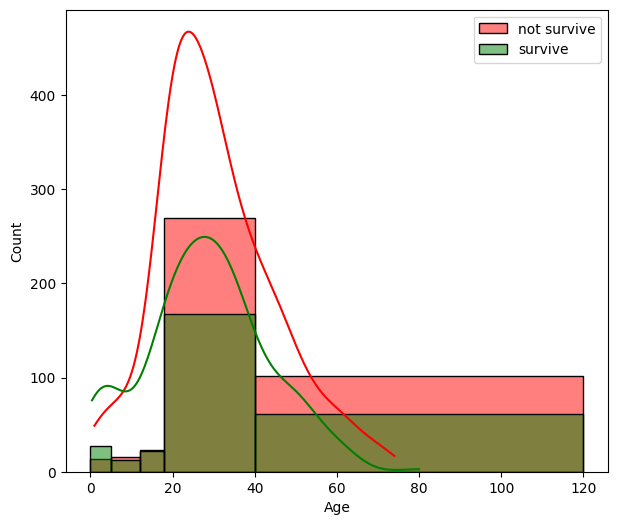

In [ ]:
plt.figure(figsize=(7, 6))
sns.histplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color="r", label="not survive", kde=True)
sns.histplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color="g", label="survive", kde=True)
plt.legend()

#**Harga vs Target**

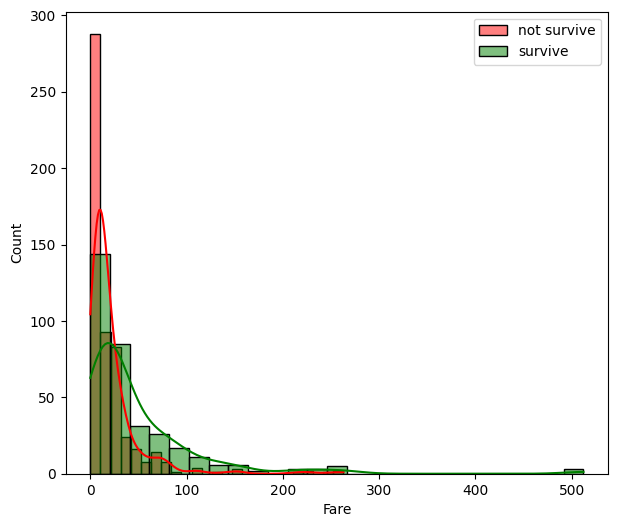

In [ ]:
plt.figure(figsize=(7, 6))
sns.histplot(df.Fare[df.Survived == 0], bins=25, color="r", label="not survive", kde=True)
sns.histplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survive", kde=True)
plt.legend()

> Harga lebih tinggi berpeluang survived lebih tinggi

#**Categoric/Ordinal vs Target**

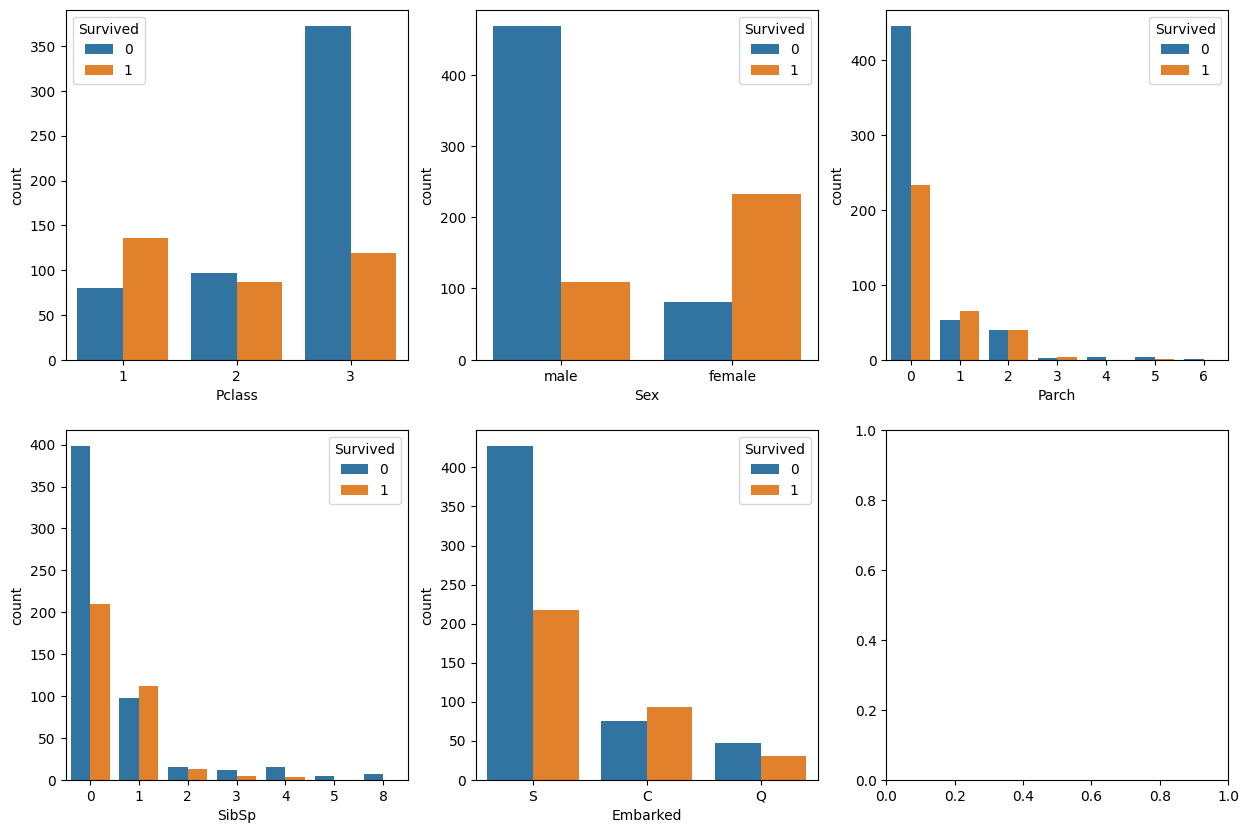

In [ ]:
cat_var = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Survived", ax=ax)

#==================Feature Engineering===================
 ==> improvement melalui data

> **Adding feature ==> isAlone**

In [ ]:
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


> **Binning (membuat angka lebih bermakna)** ==> menjadi kategorik

* Age

In [ ]:
df.Age = pd.cut(df.Age, [0, 5, 12, 18, 40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"]) #Ini inplace, jgn run 2 kali!
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,dewasa,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,dewasa,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,dewasa,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,dewasa,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,dewasa,0,0,373450,8.0500,NaN,S,True


* Fare (Harga)

In [ ]:
df.Fare = pd.cut(df.Fare, [0, 25, 100, 600], labels=["murah", "mahal", "eksekutif"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,dewasa,1,0,A/5 21171,murah,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,dewasa,1,0,PC 17599,mahal,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,dewasa,0,0,STON/O2. 3101282,murah,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,dewasa,1,0,113803,mahal,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,dewasa,0,0,373450,murah,NaN,S,True


> Setelah itu bisa langsung masuk ke dataset splitting, preprocessor (pipeline),

#==================================================

In [ ]:
df.duplicated().any()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [ ]:
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [ ]:
print(df.Sex.unique())
print(df.Age.unique())
print(df.Embarked.unique())

['male' 'female']
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
['S' 'C' 'Q' nan]


In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Figure size 800x600 with 0 Axes>

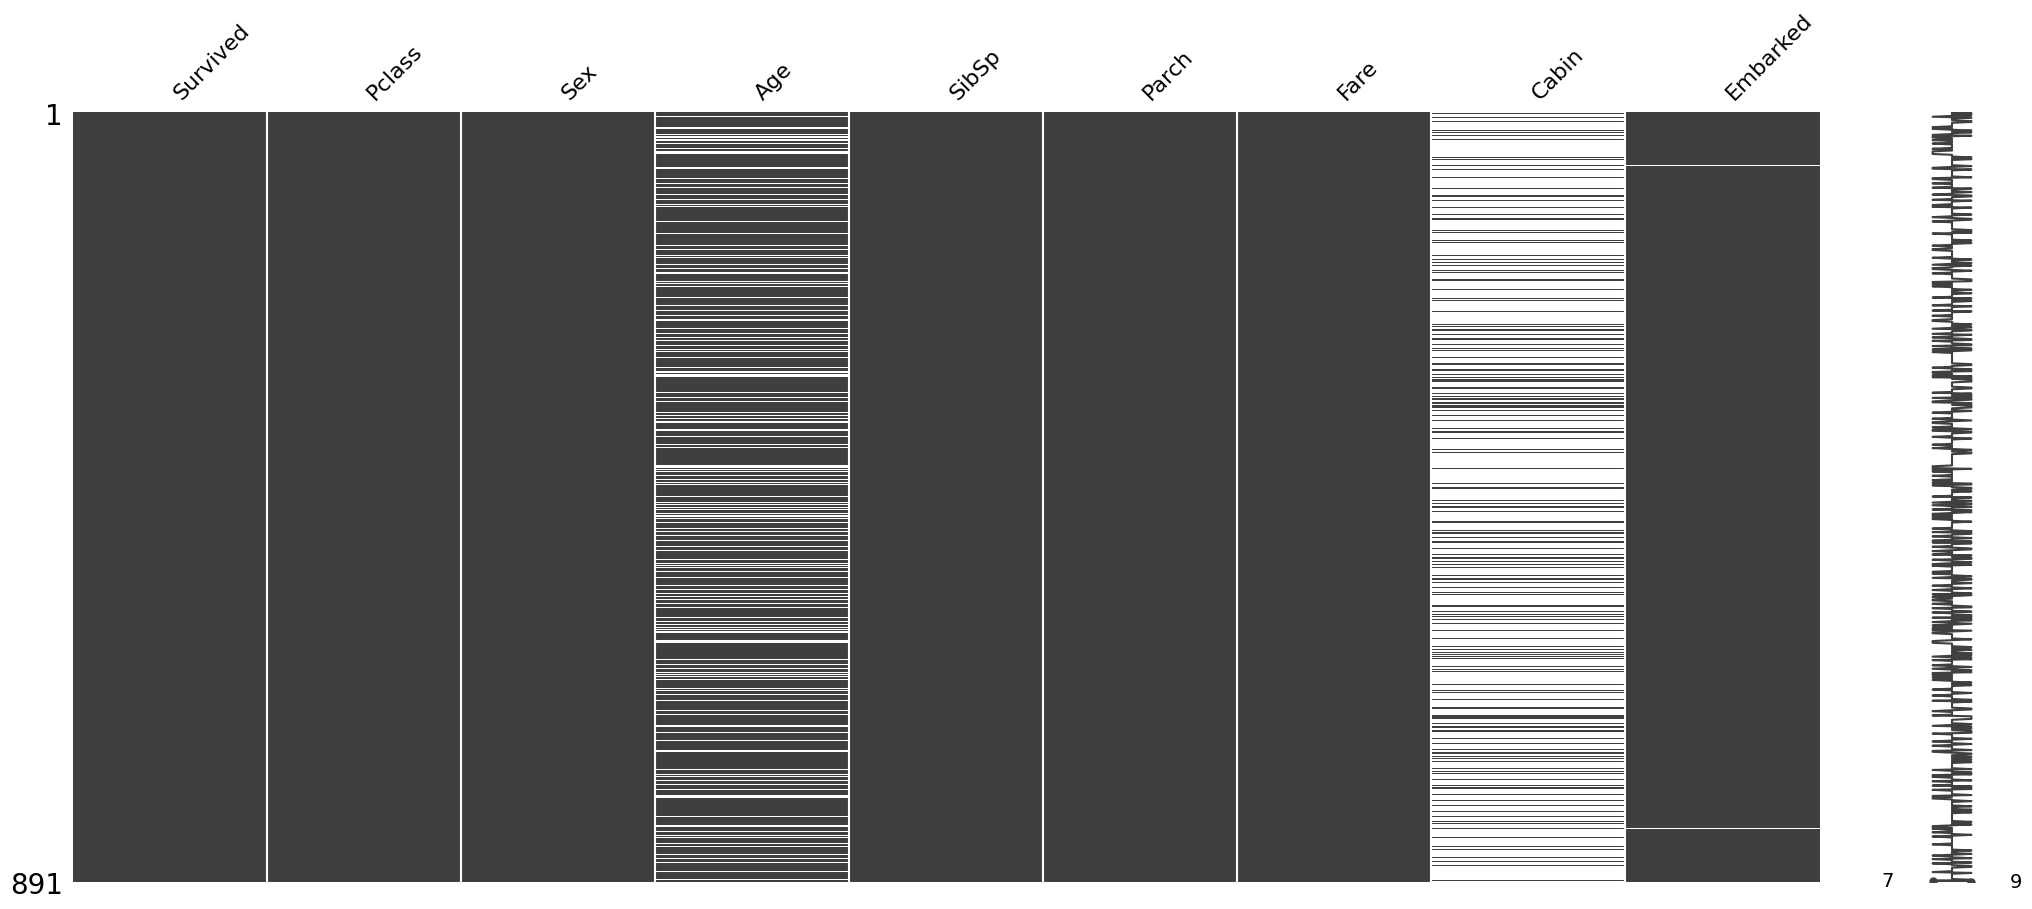

In [ ]:
plt.figure(figsize=(8, 6))
msno.matrix(df)
plt.show()

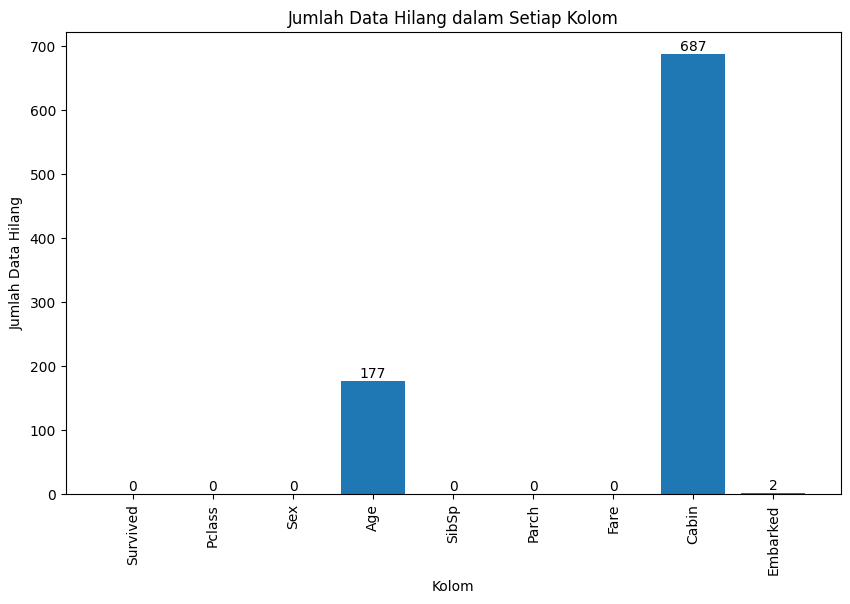

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nilai yang hilang dalam setiap kolom
jumlah_hilang = df.isnull().sum()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(jumlah_hilang.index, jumlah_hilang.values)
plt.xlabel("Kolom")
plt.ylabel("Jumlah Data Hilang")
plt.title("Jumlah Data Hilang dalam Setiap Kolom")
plt.xticks(rotation=90)

# Menampilkan jumlah data hilang pada setiap kolom di atas batang
for i, v in enumerate(jumlah_hilang.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
df.drop(columns=["Cabin"], inplace=True) #Menghapus kolom
df.dropna(subset=["Age"], inplace=True) #Menghapus baris yg kosong pada kolom

In [ ]:
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [ ]:
df.fillna({"Embarked": "S"}, inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

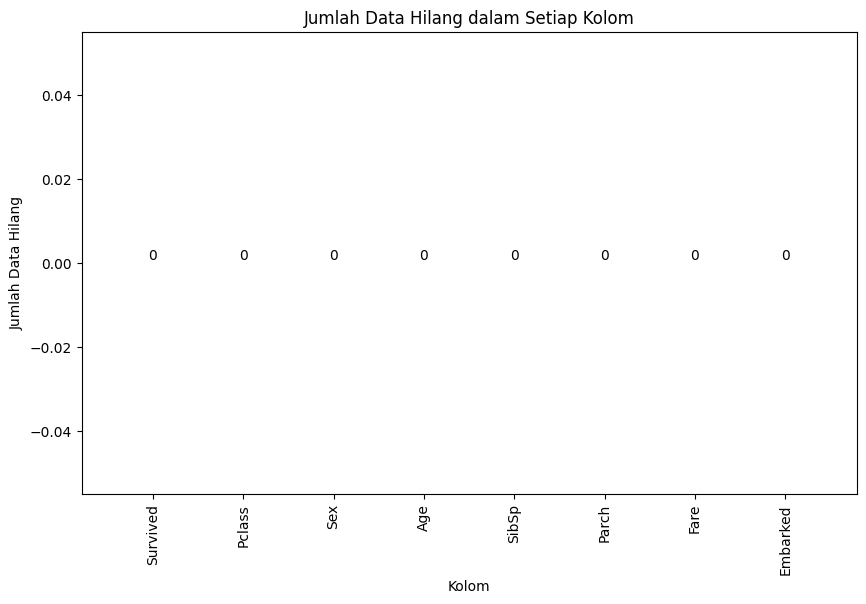

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nilai yang hilang dalam setiap kolom
jumlah_hilang = df.isnull().sum()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(jumlah_hilang.index, jumlah_hilang.values)
plt.xlabel("Kolom")
plt.ylabel("Jumlah Data Hilang")
plt.title("Jumlah Data Hilang dalam Setiap Kolom")
plt.xticks(rotation=90)

# Menampilkan jumlah data hilang pada setiap kolom di atas batang
for i, v in enumerate(jumlah_hilang.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.SibSp.value_counts()

0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

> # **Dataset Splitting**

In [ ]:
X = df.drop(columns="Survived")
y = df.Survived

# X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"]) #One hot encoding tanpa pipeline

In [ ]:
print(X.shape)
print(y.shape)

(714, 7)
(714,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [ ]:
print(X.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


> # **Preprocessor**

In [ ]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


> # Training

#KNN

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    # 'preprocessor__num__imputer__strategy': ['mean', 'median'],
    # 'preprocessor__num__scaler__with_mean': [True, False],
    # 'preprocessor__num__scaler__with_std': [True, False],
    'classifier__n_neighbors': range(1, 50, 2),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

In [ ]:
knn_grid_search = GridSearchCV(pipeline, knn_param_grid, cv=3)
knn_grid_search.fit(X_train, y_train)

print("Best parameters: ", knn_grid_search.best_params_)
print("Best cross-validation score: ", knn_grid_search.best_score_)
print("Best estimator: ", knn_grid_search.best_estimator_)
accuracy = knn_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Best parameters:  {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best cross-validation score:  0.8231927987508038
Best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                

#SVM

In [ ]:
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

svm_param_grid = {
    # 'preprocessor__num__imputer__strategy': ['mean', 'median'],
    # 'preprocessor__num__scaler__with_mean': [True, False],
    # 'preprocessor__num__scaler__with_std': [True, False],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}


In [ ]:
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train)

print("Best parameters: ", svm_grid_search.best_params_)
print("Best cross-validation score: ", svm_grid_search.best_score_)
print("Best estimator: ", svm_grid_search.best_estimator_)
accuracy = svm_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Best parameters:  {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best cross-validation score:  0.8144300541930743
Best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                      

#Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_param_grid = {
    # 'preprocessor__num__imputer__strategy': ['mean', 'median'],
    # 'preprocessor__num__scaler__with_mean': [True, False],
    # 'preprocessor__num__scaler__with_std': [True, False],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}


In [ ]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print("Best parameters: ", rf_grid_search.best_params_)
print("Best cross-validation score: ", rf_grid_search.best_score_)
print("Best estimator: ", rf_grid_search.best_estimator_)
accuracy = rf_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Best parameters:  {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best cross-validation score:  0.8301644162762929
Best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
               

#XGBoost

In [ ]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

xgb_param_grid = {
    # 'preprocessor__num__imputer__strategy': ['mean', 'median'],
    # 'preprocessor__num__scaler__with_mean': [True, False],
    # 'preprocessor__num__scaler__with_std': [True, False],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}


In [ ]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3)
xgb_grid_search.fit(X_train, y_train)

print("Best parameters: ", xgb_grid_search.best_params_)
print("Best cross-validation score: ", xgb_grid_search.best_score_)
print("Best estimator: ", xgb_grid_search.best_estimator_)
accuracy = xgb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Best parameters:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 300}
Best cross-validation score:  0.8284192155782125
Best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                    

#Naive Bayes

In [ ]:
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_param_grid = {
    # 'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
}


In [ ]:
nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=3)
nb_grid_search.fit(X_train, y_train)

print("Best parameters: ", nb_grid_search.best_params_)
print("Best cross-validation score: ", nb_grid_search.best_score_)
print("Best estimator: ", nb_grid_search.best_estimator_)
accuracy = nb_grid_search.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Best parameters:  {'classifier__var_smoothing': 1e-09}
Best cross-validation score:  0.7671167447414348
Best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
   

> # Improvement melalui model: Parameter Tuning

simple model first, then parameter tuning using grid search.

preprocessor, training(pipeline, parameter tuning, evaluation).

> # Predictions

> # Save Model

In [ ]:
import pickle

# Simpan model KNN terbaik ke dalam file pickle
best_knn_model = knn_grid_search.best_estimator_
with open('best_knn_model.pkl', 'wb') as file:
    pickle.dump(best_knn_model, file)

# Simpan model SVM terbaik ke dalam file pickle
best_svm_model = svm_grid_search.best_estimator_
with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)

# Simpan model Random Forest terbaik ke dalam file pickle
best_rf_model = rf_grid_search.best_estimator_
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

# Simpan model XGBoost terbaik ke dalam file pickle
best_xgb_model = xgb_grid_search.best_estimator_
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

# Simpan model Naive Bayes terbaik ke dalam file pickle
best_nb_model = nb_grid_search.best_estimator_
with open('best_nb_model.pkl', 'wb') as file:
    pickle.dump(best_nb_model, file)


> # Load Model